## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

In [2]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['5k_PEG', 'PS_COOH', '5k_PEG_NH2', 'PS_NH2']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [3]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                #os.remove(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                #fstats['Calcium Concentration'] = pd.Series(fstats.shape[0]*[str(calcs)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_5k_PEG_3mM_XY01.csv
features_5k_PEG_3mM_XY02.csv
features_5k_PEG_3mM_XY03.csv
features_5k_PEG_3mM_XY04.csv
features_5k_PEG_3mM_XY05.csv
features_5k_PEG_3mM_XY06.csv
features_5k_PEG_3mM_XY07.csv
features_5k_PEG_3mM_XY08.csv
features_5k_PEG_3mM_XY09.csv
features_5k_PEG_3mM_XY10.csv
features_PS_COOH_3mM_XY01.csv
features_PS_COOH_3mM_XY02.csv
features_PS_COOH_3mM_XY03.csv
features_PS_COOH_3mM_XY04.csv
features_PS_COOH_3mM_XY05.csv
features_PS_COOH_3mM_XY06.csv
features_PS_COOH_3mM_XY07.csv
features_PS_COOH_3mM_XY08.csv
features_PS_COOH_3mM_XY09.csv
features_PS_COOH_3mM_XY10.csv
features_5k_PEG_NH2_3mM_XY01.csv
features_5k_PEG_NH2_3mM_XY02.csv
features_5k_PEG_NH2_3mM_XY03.csv
features_5k_PEG_NH2_3mM_XY04.csv
features_5k_PEG_NH2_3mM_XY05.csv
features_5k_PEG_NH2_3mM_XY06.csv
features_5k_PEG_NH2_3mM_XY07.csv
features_5k_PEG_NH2_3mM_XY08.csv
features_5k_PEG_NH2_3mM_XY09.csv
features_5k_PEG_NH2_3mM_XY10.csv
features_PS_NH2_3mM_XY01.csv
features_PS_NH2_3mM_XY02.csv
features_PS_NH2_3mM_XY

In [11]:
types = mws

In [ ]:
fstats_new.to_csv('features.csv')

In [3]:
fstats_tot.shape

(734732, 69)

In [4]:
for mw in mws:
    print(fstats_tot[fstats_tot['Particle Type'] == mw].shape)

(437414, 69)
(18610, 69)
(274103, 69)
(4605, 69)


In [5]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(mws)].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [26]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff2'] = np.log(pcadataset.final['Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff1'] = np.log(pcadataset.final['Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [27]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [28]:
X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].reset_index()
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].reset_index()

In [21]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-6.53769665 -3.75434573 -0.80800635]


In [ ]:
types = ['5k_PEG', 'PS_COOH', '5k_PEG_NH2', 'PS_NH2']

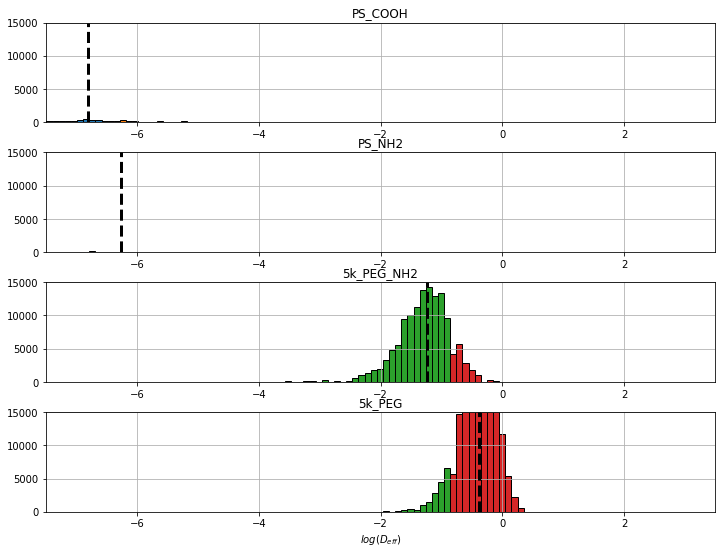

In [20]:
import matplotlib.pyplot as plt
Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
types = types_order
for ax in axes:
    means.append(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_train[(X_train['Particle Type']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

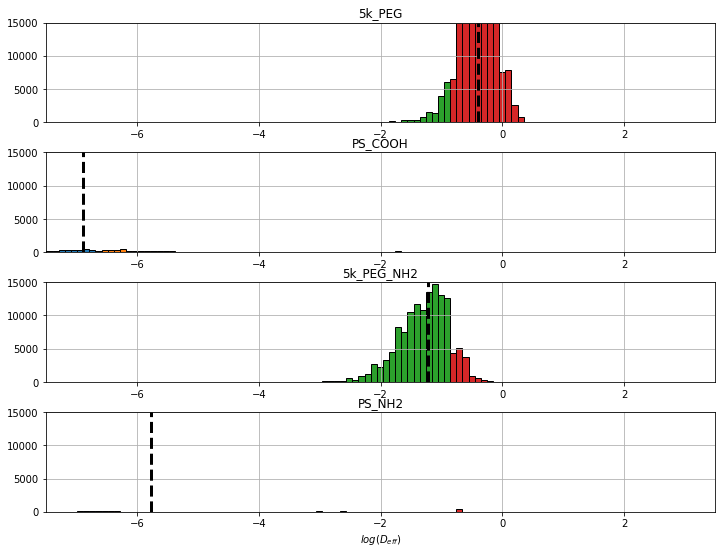

In [25]:
Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
types = mws
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [24]:
newmap = cm.viridis(np.linspace(0.9, 0.0, 4))
newmap[3-2, :] = cm.viridis(np.linspace(0.9, 0.0, 4))[3-3, :]
newmap[3-3, :] = cm.viridis(np.linspace(0.9, 0.0, 4))[3-2, :]

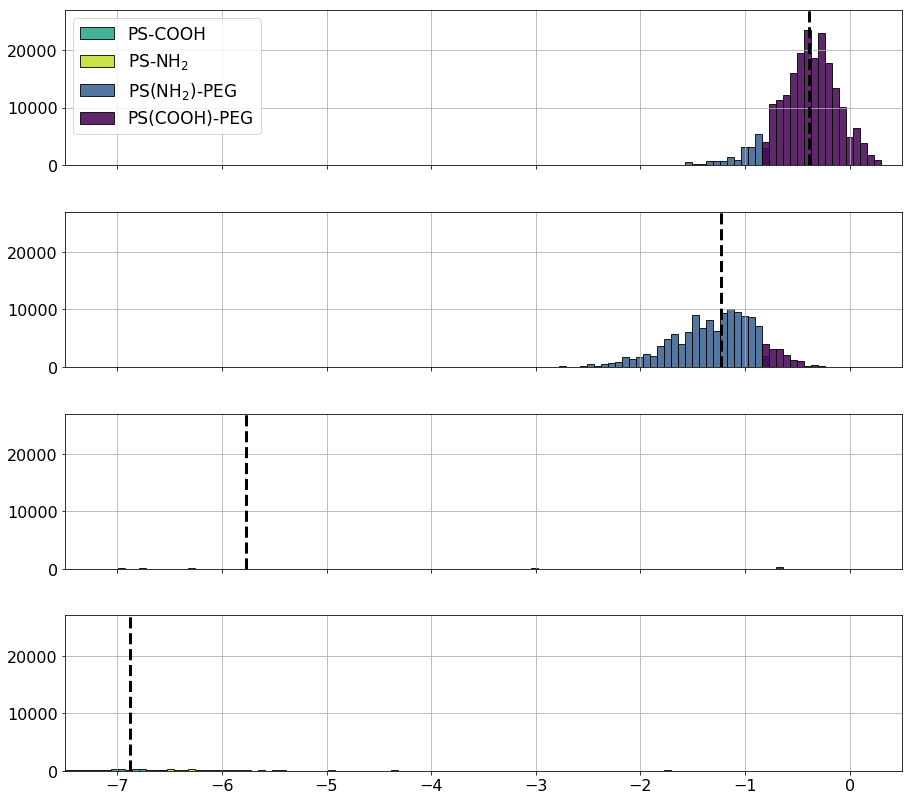

In [29]:
from matplotlib.pyplot import cm
Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 300)
fig, axes = plt.subplots(nrows=4, figsize=(15, 14))
counter = 0
means = []
#labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
types = ['5k_PEG', '5k_PEG_NH2', 'PS_NH2', 'PS_COOH']
labels3 = ['PS(COOH)-PEG', r'PS(NH$_{2}$)-PEG', r'PS-NH$_{2}$', 'PS-COOH']
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(15,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 0.5])
        ax.set_ylim([0, 27000])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    if counter == 0:
        ax.legend(fontsize=17)
    #ax.set_yticklabels([])
#     if counter == 3:
#         ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/surfacefunc3_hist.png', dpi=300, pad_inches=0.1)

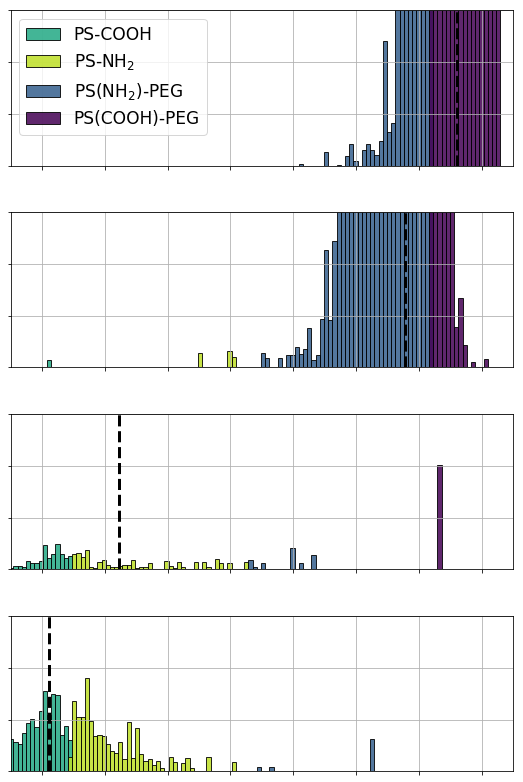

In [30]:
from matplotlib.pyplot import cm
Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 300)
fig, axes = plt.subplots(nrows=4, figsize=(9, 14))
counter = 0
means = []
#labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
types = ['5k_PEG', '5k_PEG_NH2', 'PS_NH2', 'PS_COOH']
labels3 = ['PS(COOH)-PEG', r'PS(NH$_{2}$)-PEG', r'PS-NH$_{2}$', 'PS-COOH']
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(9,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 0.5])
        ax.set_ylim([0, 600])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    if counter == 0:
        ax.legend(fontsize=17)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
#     if counter == 3:
#         ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
#     if counter != 3:
#         ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/surfacefunc3_hist_small.png', dpi=300, pad_inches=0.1)

In [16]:
from sklearn.metrics import classification_report

In [22]:
types_order = ['PS_COOH', 'PS_NH2', '5k_PEG_NH2', '5k_PEG']
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=[-10, -6.538, -3.754, -0.808, 10], labels=types).astype(str))
y_true2 = X_train['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

     5k_PEG     0.9247    0.9063    0.9154    219202
 5k_PEG_NH2     0.8517    0.8818    0.8665    135944
    PS_COOH     0.8842    0.6009    0.7155      9225
     PS_NH2     0.2266    0.3825    0.2846      2068
        nan     0.0000    0.0000    0.0000         0

avg / total     0.8927    0.8865    0.8887    366439



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [24]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=[-10, -6.538, -3.754, -0.808, 10], labels=types).astype(str))
y_true2 = X_test['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

     5k_PEG     0.9272    0.9060    0.9165    218205
 5k_PEG_NH2     0.8546    0.8892    0.8715    138066
    PS_COOH     0.8849    0.5877    0.7063      9384
     PS_NH2     0.1940    0.3044    0.2370      2536
        nan     0.0000    0.0000    0.0000         0

avg / total     0.8939    0.8874    0.8896    368191



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [3]:
ncomp = 13
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.25838383409553134
1 component: 0.41594117079531945
2 component: 0.5025658832369757
3 component: 0.5520641044972263
4 component: 0.593611727803394
5 component: 0.629075765952895
6 component: 0.6634743905503729
7 component: 0.691812817411505
8 component: 0.7173595250130365
9 component: 0.7420315182674321
10 component: 0.7653031823892714
11 component: 0.786799880882848
12 component: 0.8046937803757948


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

In [10]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [11]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Mean alpha', 'Std alpha',
       'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object')

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [4]:
import numpy as np
#ncomp = 10
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_COOH'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG_NH2'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_NH2'].values[:, -ncomp:], axis=0)

In [ ]:
dicti[3]

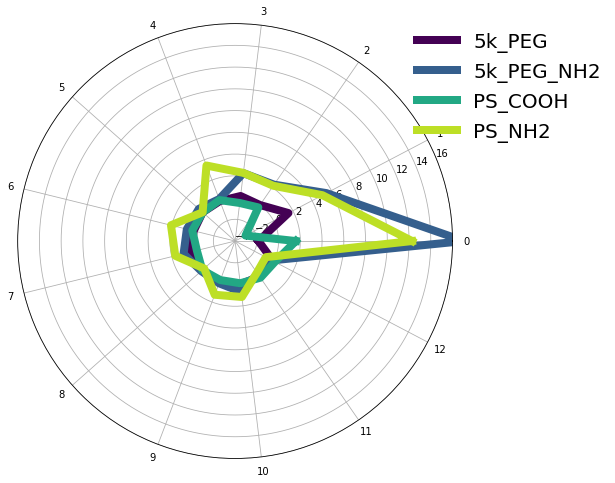

In [23]:
labels = ['5k_PEG', '5k_PEG_NH2', 'PS_COOH', 'PS_NH2']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 16, 11), filename='surfacefunc3_pcaavg.png')

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [13]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Mean straightness,Mean_Intensity,asymmetry3,Quality,Std asymmetry1,frames,alpha,Std kurtosis,Std boundedness,Std SN_Ratio,Std trappedness,Std MSD_ratio,Std kurtosis
1,Mean fractal_dim,Mean Quality,elongation,trappedness,Std asymmetry2,trappedness,Std asymmetry1,D_fit,Std trappedness,Mean SN_Ratio,Std boundedness,Mean MSD_ratio,Mean kurtosis
2,Mean efficiency,Std asymmetry3,asymmetry2,boundedness,alpha,boundedness,Std asymmetry2,Mean kurtosis,kurtosis,Std MSD_ratio,Deff1,Std trappedness,Std Quality
3,Mean trappedness,Std AR,asymmetry1,Mean Quality,MSD_ratio,straightness,D_fit,SN_Ratio,Deff1,Mean MSD_ratio,kurtosis,Std boundedness,Mean frames
4,Mean boundedness,Mean AR,AR,Std D_fit,efficiency,D_fit,Mean MSD_ratio,Deff1,D_fit,SN_Ratio,Mean AR,Std SN_Ratio,Std frames


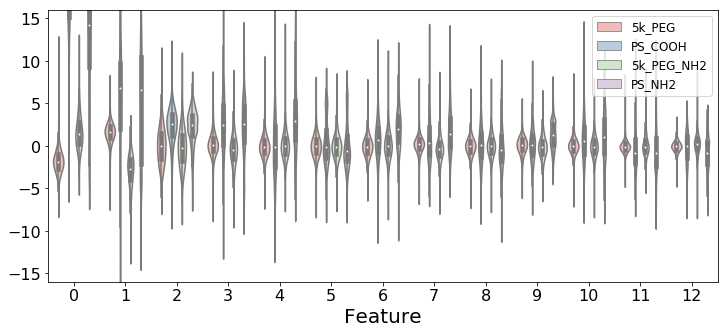

In [14]:
feats = pca.feature_violin(pcadataset.final, label='Particle Type', lvals=labels, fsubset=ncomp, yrange=[-16, 16])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 4)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(loc='upper right', prop={'size': 18})
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

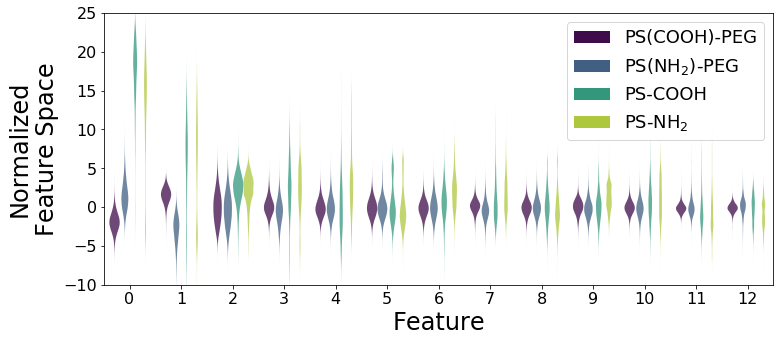

In [9]:
labels = ['5k_PEG', '5k_PEG_NH2', 'PS_COOH', 'PS_NH2']
labels2 = ['PS(COOH)-PEG', r'PS(NH$_{2}$)-PEG', 'PS-COOH', r'PS-NH$_{2}$']
feats = feature_violin(pcadataset.final, label='Particle Type', lvals=labels, labels=labels2, fsubset=13, yrange=[-10, 25],
                       legendfontsize=21, labelsize=24, fname='./pics/surfacefunc3_pcadist.png')

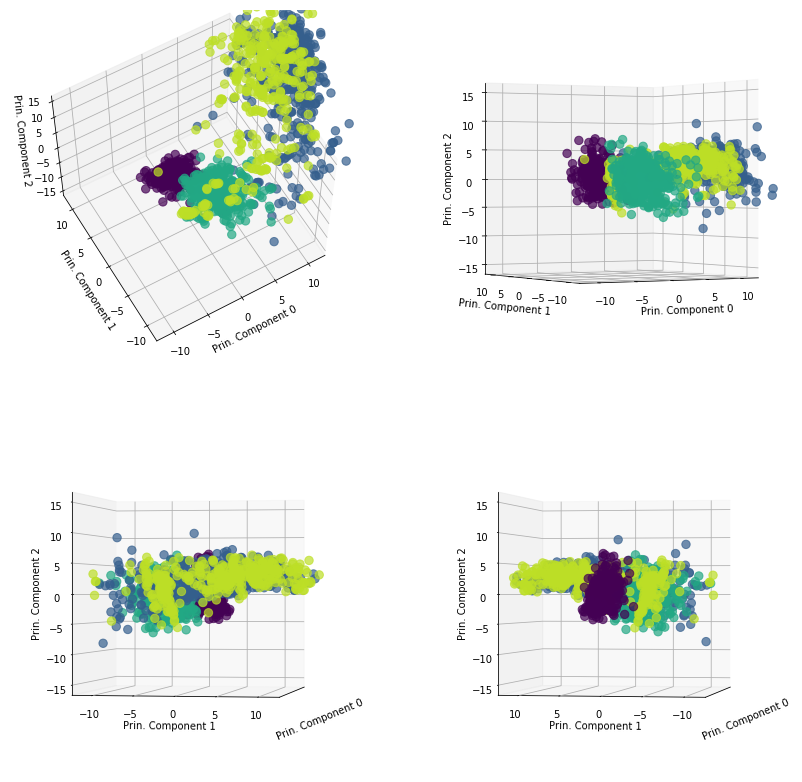

In [15]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-16, 16], features=[0, 1, 2])

## Neural Network

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [17]:
featofvar = 'Particle Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.03505417
Validation score: 0.992015
Iteration 2, loss = 0.02426857
Validation score: 0.992514
Iteration 3, loss = 0.02151060
Validation score: 0.993399
Iteration 4, loss = 0.01978666
Validation score: 0.992923
Iteration 5, loss = 0.01827942
Validation score: 0.993807
Iteration 6, loss = 0.01718208
Validation score: 0.994692
Iteration 7, loss = 0.01619858
Validation score: 0.995350
Iteration 8, loss = 0.01547923
Validation score: 0.995554
Iteration 9, loss = 0.01488102
Validation score: 0.991720
Iteration 10, loss = 0.01426839
Validation score: 0.995962
Iteration 11, loss = 0.01381589
Validation score: 0.996257
Iteration 12, loss = 0.01341970
Validation score: 0.996416
Iteration 13, loss = 0.01300652
Validation score: 0.996847
Iteration 14, loss = 0.01260616
Validation score: 0.996643
Iteration 15, loss = 0.01236873
Validation score: 0.996371
Iteration 16, loss = 0.01201906
Validation score: 0.996802
Validation score did not improve more than tol=0.000010 for two c

Text(0,0.5,'Validation Scores')

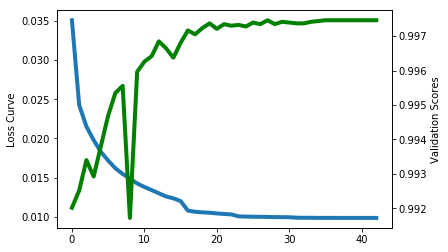

In [18]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')

## Alternate Binning

In [5]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [8]:
featofvar = 'Particle Type'

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.03813872
Validation score: 0.991540
Iteration 2, loss = 0.02439904
Validation score: 0.992277
Iteration 3, loss = 0.02034355
Validation score: 0.993450
Iteration 4, loss = 0.01766700
Validation score: 0.994351
Iteration 5, loss = 0.01592068
Validation score: 0.995033
Iteration 6, loss = 0.01448753
Validation score: 0.993860
Iteration 7, loss = 0.01340227
Validation score: 0.995470
Iteration 8, loss = 0.01259377
Validation score: 0.995961
Iteration 9, loss = 0.01198439
Validation score: 0.996562
Iteration 10, loss = 0.01139708
Validation score: 0.996452
Iteration 11, loss = 0.01082351
Validation score: 0.996589
Iteration 12, loss = 0.01052607
Validation score: 0.996698
Iteration 13, loss = 0.01006922
Validation score: 0.996589
Iteration 14, loss = 0.00987203
Validation score: 0.996562
Iteration 15, loss = 0.00965297
Validation score: 0.996834
Iteration 16, loss = 0.00944249
Validation score: 0.995988
Iteration 17, loss = 0.00927054
Validation score: 0.996971
Iterat